# Import libraries

In [37]:
import pandas as pd
import numpy as np
import io 
from scipy import stats

import ast
from collections import defaultdict

from os import listdir
from os.path import isfile, join

import seaborn as sns
import matplotlib.pyplot as plt



# 1. Reading the results

We read the results from text files into Pandas DataFrames for analysis.

In [2]:
# PARAMETER TUNING

path = "./tuning/"
files = [f for f in listdir(path) if isfile(join(path, f))]

dd = defaultdict(list)

for file in files:
    f_path = join(path,file)
    with open(f_path) as f:
        lines = f.readlines()
        str_dict = lines[0]
        dset = lines[2]
        # convert dictionary string to dictionary
        t_dict = ast.literal_eval(str_dict)
        
        keys = t_dict['params'].keys()
        if 'gamma' in keys:
            t_dict['params'].update({"algorithm": "GaGRAD"})
        elif 'coef_p' in keys:
            t_dict['params'].update({"algorithm": "PsoGRAD"})
        elif 'step_size' in keys:
            t_dict['params'].update({"algorithm": "PlsGRAD"})
        else:
            t_dict['params'].update({"algorithm": "PrsGRAD"})
            
        if 'breast_cancer' in dset:
            t_dict['params'].update({"data_src": "BCR", "objects": 116, "attributes": 10})
        elif 'hungary_chickenpox' in dset:
            t_dict['params'].update({"data_src": "CPX", "objects": 521, "attributes": 20})
        elif 'c2k' in dset:
            t_dict['params'].update({"data_src": "C2K", "objects": 3942, "attributes": 98})
        elif 'Omnidir_site10k' in dset:
            t_dict['params'].update({"data_src": "OMD", "objects": 10000, "attributes": 11})
        elif 'hcv_data' in dset:
            t_dict['params'].update({"data_src": "HCV", "objects": 615, "attributes": 14})
        elif 'aps_5k' in dset:
            t_dict['params'].update({"data_src": "APS", "objects": 5634, "attributes": 171})
        elif 'power_consumption19k' in dset:
            t_dict['params'].update({"data_src": "HPC", "objects": 19443, "attributes": 9})
        elif 'air_quality' in dset:
            t_dict['params'].update({"data_src": "AQY", "objects": 9358, "attributes": 15})
        elif 'directio15k' in dset:
            t_dict['params'].update({"data_src": "DIR", "objects": 15402, "attributes": 21})
        elif 'x_data' in dset:
            t_dict['params'].update({"data_src": "XDA", "objects": 15398, "attributes": 30})
        

        for key, value in t_dict.items():
            dd[key].append(value)
        # print(type(t_dict))
        # print(t_dict)
        # print(dset)
#dd
# Create data-frames
df_tune = pd.DataFrame.from_dict(dd['params'])
df_tune_ga = df_tune.loc[df_tune['algorithm'] == 'GaGRAD'][['algorithm', 'data_src', 'objects', 'attributes', 'max_iteration', 'n_pop', 'pc', 'gamma', 'mu', 'sigma']]
df_tune_pso = df_tune.loc[df_tune['algorithm'] == 'PsoGRAD'][['algorithm', 'data_src', 'objects', 'attributes', 'max_iteration', 'n_particles', 'velocity', 'coef_p', 'coef_g']]
df_tune_pls = df_tune.loc[df_tune['algorithm'] == 'PlsGRAD'][['algorithm', 'data_src', 'objects', 'attributes', 'max_iteration', 'step_size']]
df_tune_prs = df_tune.loc[df_tune['algorithm'] == 'PrsGRAD'][['algorithm', 'data_src', 'objects', 'attributes', 'max_iteration']]




# ------------------------------------------------------------------
# COMPARATIVE ANALYSIS

path = "./spaces/"
files = [f for f in listdir(path) if isfile(join(path, f))]

df_graank = pd.DataFrame(columns = ["Data-set", "Size", "Algorithm", "Support", "Run-time", "Memory", "Patterns", "Pattern-count", "Invalid-Patterns"])
df_aco = pd.DataFrame(columns = ["Data-set", "Size", "Algorithm", "Support", "Run-time", "Memory", "Patterns", "Pattern-count", "Invalid-Patterns", "E-Factor"])
df_lcm = pd.DataFrame(columns = ["Data-set", "Size", "Algorithm", "Support", "Run-time", "Memory", "Patterns", "Pattern-count", "Invalid-Patterns"])
df_ga = pd.DataFrame(columns = ["Data-set", "Size", "Algorithm", "Support", "Run-time", "Memory", "Patterns", "Pattern-count", "Invalid-Patterns", "Search-Space", "N-pop", "PC", "Gamma", "Mu", "Sigma", "Max-Iteration", "Max-Evaluation", "Iterations", "Candidates"])
df_pso = pd.DataFrame(columns = ["Data-set", "Size", "Algorithm", "Support", "Run-time", "Memory", "Patterns", "Pattern-count", "Invalid-Patterns", "Search-Space", "N-particle", "Velocity", "Coef-P", "Coef-G", "Max-Iteration", "Max-Evaluation", "Iterations", "Candidates"])
df_pls = pd.DataFrame(columns = ["Data-set", "Size", "Algorithm", "Support", "Run-time", "Memory", "Patterns", "Pattern-count", "Invalid-Patterns", "Search-Space", "Step-Size", "Max-Iteration", "Max-Evaluation", "Iterations", "Candidates"])
df_prs = pd.DataFrame(columns = ["Data-set", "Size", "Algorithm", "Support", "Run-time", "Memory", "Patterns", "Pattern-count", "Invalid-Patterns", "Search-Space", "Max-Iteration", "Max-Evaluation", "Iterations", "Candidates"])

for file in files:
    f_path = join(path, file)
    try:
        res = pd.read_csv(f_path, names=["A","B"], sep = ':', header=None, engine='python')
    except Exception:
        print(f_path)
    
    run = float(res['B'][0][0:6]) # run-time
    mem = float(res['B'][1][0:5]) # memory
    alg = res['B'][2] # algorithm
    # print(alg)
    
    if alg == " GRAANK ":
        att = int(res['B'][3]) # number of attributes in the data set
        size = int(res['B'][4])  # data set size

        sup = float(res['B'][5]) # minimum support
        pat = int(res['B'][7]) # patterns
        inv = int(res['B'][8]) # invalid patterns count
    elif alg == " LCM-GRAD (1.0) ":
        att = int(res['B'][3]) # number of attributes in the data set
        size = int(res['B'][4])  # data set size

        sup = float(res['B'][5]) # minimum support
        pat = int(res['B'][7]) # patterns
        inv = int(res['B'][8]) # invalid patterns count
    elif alg == " ACO-GRAANK (v4.0)":
        att = int(res['B'][3]) # number of attributes in the data set
        size = int(res['B'][4])  # data set size
        
        evp = float(res['B'][5]) # evaporation-factor / erasure-probability
    
        sup = float(res['B'][7]) # minimum support
        pat = int(res['B'][9]) # patterns
        inv = int(res['B'][10]) # invalid patterns count
    else:
        ssp = res['B'][3] # search space
        att = int(res['B'][4]) # number of attributes in the data set
        size = int(res['B'][5])  # data set size
        
        if alg == " GA-GRAANK (v2.0)" or alg == " GA-GRAANK (v1.0)":

            pop = int(res['B'][6]) # Initial population
            pc = float(res['B'][7]) # children proportion
            gam = float(res['B'][8]) # Gamma
            mu = float(res['B'][9]) # Mu
            sig = float(res['B'][10]) # Sigma
            mit = int(res['B'][11]) # Maximum iteration count
            mev = int(res['B'][12]) # Maximum evaluation count
            can = str(res['B'][13]) # Candidates

            sup = float(res['B'][14]) # minimum support
            pat = int(res['B'][16]) # patterns
            inv = int(res['B'][17]) # invalid patterns count
        elif alg == " PSO-GRAANK (v2.0)" or alg == " PSO-GRAANK (v1.0)":

            pop = int(res['B'][6]) # Initial particle population
            vel = float(res['B'][7]) # velocity
            co1 = float(res['B'][8]) # Personal coefficient
            co2 = float(res['B'][9]) # Global coefficient
            mit = int(res['B'][10]) # Maximum iteration count
            mev = int(res['B'][11]) # Maximum evaluation count
            can = str(res['B'][12]) # Candidates

            sup = float(res['B'][13]) # minimum support
            pat = int(res['B'][15]) # patterns
            inv = int(res['B'][16]) # invalid patterns count
        elif alg == " PLS-GRAANK (v2.0)" or alg == " PLS-GRAANK (v1.0)":

            step = float(res['B'][6]) # Step size
            mit = int(res['B'][8]) # Maximum iteration count
            mev = int(res['B'][9]) # Maximum evaluation count
            can = str(res['B'][10]) # Candidates

            sup = float(res['B'][11]) # minimum support
            pat = int(res['B'][13]) # patterns
            inv = int(res['B'][14]) # invalid patterns count
        elif alg == " PRS-GRAANK (v2.0)" or alg == " PRS-GRAANK (v1.0)":

            mit = int(res['B'][7]) # Maximum iteration count
            mev = int(res['B'][8]) # Maximum evaluation count
            can = str(res['B'][9]) # Candidates

            sup = float(res['B'][10]) # minimum support
            pat = int(res['B'][12]) # patterns
            inv = int(res['B'][13]) # invalid patterns count
            
        # Fetch best-cost iteration values
        its = [0] * mit
        it_st = res.loc[res['B'] == ' Best Cost'].index[0] + 1 # iterations
        for i in range(mit):
            it = i + it_st
            its[i] = float(res['B'][it]) # cost
    
    # Fetch patterns
    gps = [""] * pat
    gp_pos = res.loc[res['A'] == 'Pattern '].index[0] + 1 # 1st position
    for i in range(pat):
        pos = i + gp_pos
        gps[i] = [res['A'][pos], float(res['B'][pos])]
    
    if att == 11:
        if size == 10000:
            col = "OMD"
        else:
            col = "HCV"
    elif att == 98:
        col = "C2K"
    elif att == 15:
        col = "AQY"
    elif att == 10:
        col = "BCR"
    elif att == 21:
        if size == 15402:
            col = "DIR"
        else:
            col = "CPX"
    elif att == 170:
        col = "APS"
    elif att == 9:
        col = "HPC"
    else:
        col = "** Check **"
    # print(str(att) + ': ' + str(size) + ' - ' + str(col))
        
    if alg == " GRAANK ":
        df_graank = df_graank.append({"Data-set":col, "Size":size, "Algorithm":alg, "Support":sup, "Run-time":run, "Memory":mem, "Patterns":gps, "Pattern-count":pat, "Invalid-Patterns":inv}, ignore_index=True)
        df_graank['Algorithm'].replace({' GRAANK ' : 'GRAANK'}, inplace=True)
    elif alg == " LCM-GRAD (1.0) ":
        df_lcm = df_lcm.append({"Data-set":col, "Size":size, "Algorithm":alg, "Support":sup, "Run-time":run, "Memory":mem, "Patterns":gps, "Pattern-count":pat, "Invalid-Patterns":inv}, ignore_index=True)
        df_lcm['Algorithm'].replace({' LCM-GRAD (1.0) ' : 'LcmGRAD'}, inplace=True)
    elif alg == " ACO-GRAANK (v4.0)":
        df_aco = df_aco.append({"Data-set":col, "Size":size, "Algorithm":alg, "Support":sup, "Run-time":run, "Memory":mem, "Patterns":gps, "Pattern-count":pat, "Invalid-Patterns":inv, "E-Factor":evp}, ignore_index=True)
        df_aco['Algorithm'].replace({' ACO-GRAANK (v4.0)' : 'AcoGRAD'}, inplace=True)
    elif alg == " GA-GRAANK (v2.0)" or alg == " GA-GRAANK (v1.0)":
        df_ga = df_ga.append({"Data-set":col, "Size":size, "Algorithm":alg, "Support":sup, "Run-time":run, "Memory":mem, "Patterns":gps, "Pattern-count":pat, "Invalid-Patterns":inv, "Search-Space": ssp, "N-pop":pop, "PC":pc, "Gamma":gam, "Mu":mu, "Sigma":sig, "Max-Iteration":mit, "Max-Evaluation":mev, "Iterations":its, "Candidates":can}, ignore_index=True)
        df_ga['Algorithm'].replace({' GA-GRAANK (v1.0)' : 'GaGRAD-BM'}, inplace=True)
        df_ga['Algorithm'].replace({' GA-GRAANK (v2.0)' : 'GaGRAD-NU'}, inplace=True)
    elif alg == " PSO-GRAANK (v2.0)" or alg == " PSO-GRAANK (v1.0)":
        df_pso = df_pso.append({"Data-set":col, "Size":size, "Algorithm":alg, "Support":sup, "Run-time":run, "Memory":mem, "Patterns":gps, "Pattern-count":pat, "Invalid-Patterns":inv, "Search-Space": ssp, "N-particle":pop, "Velocity":vel, "Coef-P":co1, "Coef-G":co2, "Max-Iteration":mit, "Max-Evaluation":mev, "Iterations":its, "Candidates":can}, ignore_index=True)
        df_pso['Algorithm'].replace({' PSO-GRAANK (v1.0)' : 'PsoGRAD-BM'}, inplace=True)
        df_pso['Algorithm'].replace({' PSO-GRAANK (v2.0)' : 'PsoGRAD-NU'}, inplace=True)
    elif alg == " PLS-GRAANK (v2.0)" or alg == " PLS-GRAANK (v1.0)":
        df_pls = df_pls.append({"Data-set":col, "Size":size, "Algorithm":alg, "Support":sup, "Run-time":run, "Memory":mem, "Patterns":gps, "Pattern-count":pat, "Invalid-Patterns":inv, "Search-Space": ssp, "Step-Size":step, "Max-Iteration":mit, "Max-Evaluation":mev, "Iterations":its, "Candidates":can}, ignore_index=True)
        df_pls['Algorithm'].replace({' PLS-GRAANK (v1.0)' : 'PlsGRAD-BM'}, inplace=True)
        df_pls['Algorithm'].replace({' PLS-GRAANK (v2.0)' : 'PlsGRAD-NU'}, inplace=True)
    elif alg == " PRS-GRAANK (v2.0)" or alg == " PRS-GRAANK (v1.0)":
        df_prs = df_prs.append({"Data-set":col, "Size":size, "Algorithm":alg, "Support":sup, "Run-time":run, "Memory":mem, "Patterns":gps, "Pattern-count":pat, "Invalid-Patterns":inv, "Search-Space": ssp, "Max-Iteration":mit, "Max-Evaluation":mev, "Iterations":its, "Candidates":can}, ignore_index=True)
        df_prs['Algorithm'].replace({' PRS-GRAANK (v1.0)' : 'PrsGRAD-BM'}, inplace=True)
        df_prs['Algorithm'].replace({' PRS-GRAANK (v2.0)' : 'PrsGRAD-NU'}, inplace=True)

#df_ga
#df_pso
#df_pls
#df_prs
#df_graank
#df_aco
#df_lcm

# 2. Parameter Tuning
We perform 2 experiments that helps us choose the best parameters for all the algorithms.

## 2.1 Determining maximum iteration value (T)
First we determine the value of T for the algorithms

<AxesSubplot:xlabel='data_src', ylabel='max_iteration'>

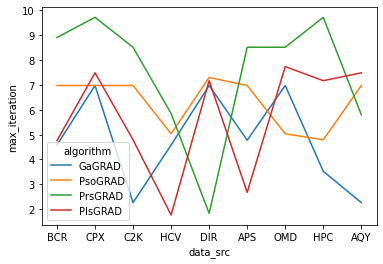

In [3]:
sns.lineplot(data=df_tune, x='data_src', y="max_iteration", hue="algorithm")

## 2.2 Determining the optimum parameter values
For each algorithm we determine the optimum parameter values that will guarantee maximum efficiency.

### 2.2.1. GA-GRAD Algorithm

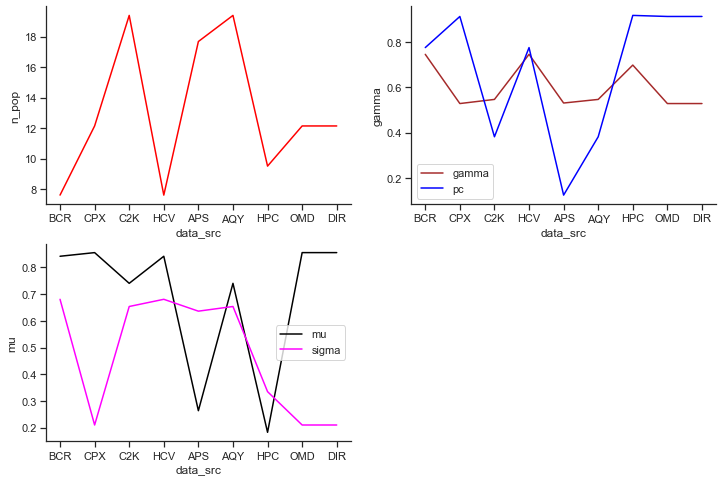

,algorithm,data_src,objects,attributes,max_iteration,n_pop,pc,gamma,mu,sigma
0,GaGRAD,BCR,116,10,4.579092,7.607551,0.775731,0.745913,0.842007,0.680798
1,GaGRAD,CPX,521,20,6.974152,12.144546,0.913062,0.528717,0.855676,0.209980
3,GaGRAD,C2K,3942,98,2.263482,19.396970,0.382082,0.546952,0.740596,0.653858
7,GaGRAD,HCV,615,14,4.579092,7.607551,0.775731,0.745913,0.842007,0.680798
14,GaGRAD,APS,5634,171,4.772751,17.684231,0.124649,0.531053,0.263562,0.636374
19,GaGRAD,AQY,9358,15,2.263482,19.396970,0.382082,0.546952,0.740596,0.653858
20,GaGRAD,HPC,19443,9,3.523996,9.509977,0.917736,0.698533,0.182581,0.334891
29,GaGRAD,OMD,10000,11,6.974152,12.144546,0.913062,0.528717,0.855676,0.209980
32,GaGRAD,DIR,15402,21,6.974152,12.144546,0.913062,0.528717,0.855676,0.209980


In [83]:
fig = plt.figure(figsize=(12,8))

plt.subplot(2, 2, 1)
sns.lineplot(data=df_tune_ga, x='data_src', y="n_pop", color='red')

#plt.subplot(2, 2, 2)
#sns.lineplot(data=df_ga, x='data_src', y="pc", color='blue')

plt.subplot(2, 2, 2)
sns.lineplot(data=df_tune_ga, x='data_src', y="gamma", color='brown', label='gamma')
sns.lineplot(data=df_tune_ga, x='data_src', y="pc", color='blue', label='pc')


plt.subplot(2, 2, 3)
sns.lineplot(data=df_tune_ga, x='data_src', y="mu", color='black', label='mu')
sns.lineplot(data=df_tune_ga, x='data_src', y="sigma", color='magenta', label='sigma')

#plt.subplot(2, 3, 5)
#sns.lineplot(data=df_ga, x='data_src', y="sigma", color='magenta')

plt.show()
#plt.savefig('tune_ga.png')

# multiple lines with legend
#plt.plot(df_ga['data_src'],df_ga['max_iteration'], marker='.', color='r', label= 'max-iteration')
#plt.plot(df_ga['data_src'],df_ga['n_pop'], marker='+', color = 'g', label= 'n-pop')
#plt.legend();

df_tune_ga

### 2.2.2. PSO-GRAD Algorithm

,algorithm,data_src,objects,attributes,max_iteration,n_particles,velocity,coef_p,coef_g
2,PsoGRAD,BCR,116,10,6.974152,18.947300,0.627900,0.139963,0.431343
12,PsoGRAD,C2K,3942,98,6.974152,18.947300,0.627900,0.139963,0.431343
15,PsoGRAD,CPX,521,20,6.974152,18.947300,0.627900,0.139963,0.431343
18,PsoGRAD,OMD,10000,11,5.031042,6.578669,0.358998,0.731423,0.324355
22,PsoGRAD,AQY,9358,15,6.974152,18.947300,0.627900,0.139963,0.431343
24,PsoGRAD,HPC,19443,9,4.789969,11.130140,0.722689,0.802514,0.235864
28,PsoGRAD,APS,5634,171,6.974152,18.947300,0.627900,0.139963,0.431343
33,PsoGRAD,HCV,615,14,5.031042,6.578669,0.358998,0.731423,0.324355
35,PsoGRAD,DIR,15402,21,7.297825,8.867064,0.724960,0.217383,0.559294


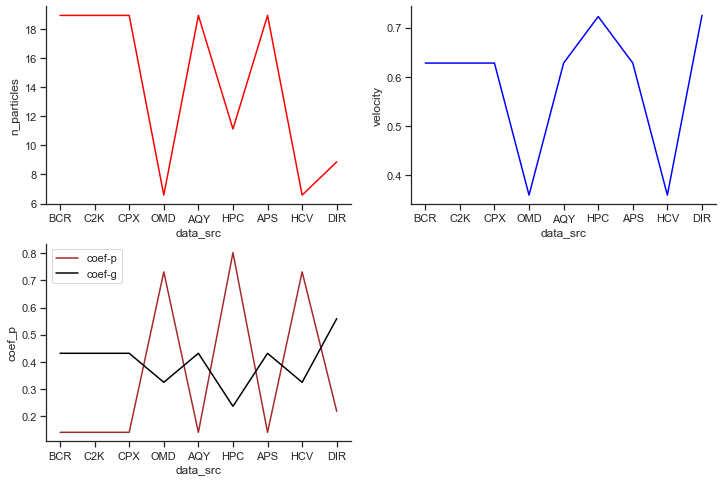

In [78]:
fig = plt.figure(figsize=(12,8))

plt.subplot(2, 2, 1)
sns.lineplot(data=df_tune_pso, x='data_src', y="n_particles", color='red')

plt.subplot(2, 2, 2)
sns.lineplot(data=df_tune_pso, x='data_src', y="velocity", color='blue')

plt.subplot(2, 2, 3)
sns.lineplot(data=df_tune_pso, x='data_src', y="coef_p", color='brown', label='coef-p')
sns.lineplot(data=df_tune_pso, x='data_src', y="coef_g", color='black', label='coef-g')

#plt.subplot(2, 2, 4)
#sns.lineplot(data=df_tune_pso, x='data_src', y="coef_g", color='black')


plt.show()
#plt.savefig('tune_pso.png')


df_tune_pso

### 2.2.3. PLS-GRAD Algorithm

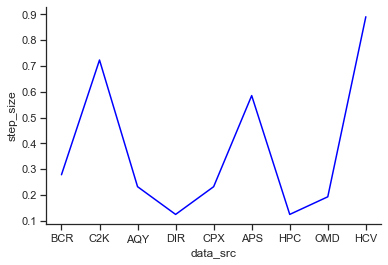

,algorithm,data_src,objects,attributes,max_iteration,step_size
5,PlsGRAD,BCR,116,10,4.755743,0.278291
6,PlsGRAD,C2K,3942,98,4.789969,0.722689
17,PlsGRAD,AQY,9358,15,7.482920,0.232080
21,PlsGRAD,DIR,15402,21,7.166976,0.124649
25,PlsGRAD,CPX,521,20,7.482920,0.232080
26,PlsGRAD,APS,5634,171,2.676342,0.584935
27,PlsGRAD,HPC,19443,9,7.166976,0.124649
30,PlsGRAD,OMD,10000,11,7.733491,0.192903
34,PlsGRAD,HCV,615,14,1.765398,0.890328


In [81]:
fig = plt.figure(figsize=(6,4))
sns.lineplot(data=df_tune_pls, x='data_src', y="step_size", color='blue')

plt.show()
#plt.savefig('tune_pls.png')


df_tune_pls

### 2.2.4. PRS-GRAD Algorithm

In [8]:
df_tune_prs

,algorithm,data_src,objects,attributes,max_iteration
4,PrsGRAD,HCV,615,14,5.849351
8,PrsGRAD,C2K,3942,98,8.511631
9,PrsGRAD,DIR,15402,21,1.831047
10,PrsGRAD,APS,5634,171,8.511631
11,PrsGRAD,OMD,10000,11,8.511631
13,PrsGRAD,HPC,19443,9,9.714354
16,PrsGRAD,BCR,116,10,8.903283
23,PrsGRAD,CPX,521,20,9.714354
31,PrsGRAD,AQY,9358,15,5.798488


## 3. Comparing Bitmap and Numeric Search Spaces
We compare the performance of each algorithm on the Numeric search space against the Bitmap search space.

First, we calculate the mean and group the results into specific data frames.


In [9]:
data_sets = ['APS', 'AQY', 'BCR', 'C2K', 'CPX', 'DIR', 'HCV', 'HPC', 'OMD']
algorithms = ['GRAANK', 'AcoGRAD', 'LcmGRAD', 'GaGRAD-NU', 'PsoGRAD-NU', 'PlsGRAD-NU', 'PrsGRAD-NU', 'GaGRAD-BM', 'PsoGRAD-BM', 'PlsGRAD-BM', 'PrsGRAD-BM']


# Combining the results
frames = [df_graank, df_aco, df_lcm, df_ga, df_pso, df_pls, df_prs]
df_res = pd.concat(frames, ignore_index=True)

# Only include these columns
df_res = df_res[["Data-set", "Size", "Algorithm", "Support", "Run-time", "Memory", "Patterns", "Pattern-count", "Invalid-Patterns", "Search-Space", "Max-Iteration", "Max-Evaluation", "Iterations", "Candidates"]]




it = 20
data = []

for ds in data_sets:
    df1 = df_res.loc[df_res['Data-set'] == ds]
    
    for alg in algorithms:
        df2 = df1.loc[df1['Algorithm'].str.contains(alg)]      
        df3 = df2.loc[df2['Max-Iteration'] == it]    
        # print(df3)
        # print(alg)
        
        if df2.empty:
            # print(str(ds) + ': ' + str(alg))
            continue
        elif df3.empty:
            data.append([ds, alg, df2['Run-time'].mean(), df2['Run-time'].std(), df2['Memory'].mean(), df2['Memory'].std(), df2['Pattern-count'].mean(), df2['Pattern-count'].std(), df2['Invalid-Patterns'].mean(), df2['Invalid-Patterns'].std()])
        else:
            its_arr = []
            cand_arr = []
            for index,row in df3.iterrows():
                # 20 iterations
                its_arr.append(row['Iterations'])
                cand_arr.append(row['Candidates'])
            its_arr = np.array(its_arr)
            cand_arr = np.array(cand_arr)
            # print(cand_arr)
            
            its_avg = np.mean(its_arr, axis=0)
            its_std = np.std(its_arr, axis=0)
            # cand_avg = np.median(cand_arr, axis=0)

            data.append([ds, alg, df3['Run-time'].mean(), df3['Run-time'].std(), df3['Memory'].mean(), df3['Memory'].std(), df3['Pattern-count'].mean(), df3['Pattern-count'].std(), df3['Invalid-Patterns'].mean(), df3['Invalid-Patterns'].std(), it, its_avg, its_std])

df_data = pd.DataFrame(data=data, columns=['Data-set', 'Algorithm', 'Run-time (mean)', 'Run-time (std)', 'Memory (mean)', 'Memory (std)', 'Patterns (mean)', 'Patterns (std)', 'Invalid-patterns (mean)', 'Invalid-patterns (std)', 'Iterations', 'Iterations (mean)', 'Iterations (std)'])
df_tab = df_data[['Data-set', 'Algorithm', 'Run-time (mean)', 'Run-time (std)', 'Memory (mean)', 'Memory (std)', 'Patterns (mean)', 'Patterns (std)', 'Run-time (mean)', 'Run-time (std)']]
# df_data


# df_gps = df_res[["Data-set", "Algorithm", "Patterns", "Search-Space"]]
# df_space = df_res[["Data-set", "Algorithm", "Run-time", "Memory", "Pattern-count", "Invalid-Patterns", "Search-Space", "Max-Evaluation", "Candidates"]]
# df_comp = df_res[["Data-set", "Algorithm", "Run-time", "Memory", "Pattern-count", "Invalid-Patterns"]]
# df_comp
# df_res

### 3.1 Wilcoxon Test
We would like to verify that the run-time is faster on the Numeric search space and slower on the Bitmap search space. We are only comparing 2 variables (i.e., numeric search space and binary search space), therefore the Wilcoxon test is best suited for this experiment. Friedman test requires at least 3 or more variables.

#### 3.1.1 Run-time comparison


In [14]:
algorithms = ['GaGRAD-NU', 'GaGRAD-BM', 'PsoGRAD-NU', 'PsoGRAD-BM', 'PlsGRAD-NU', 'PlsGRAD-BM', 'PrsGRAD-NU', 'PrsGRAD-BM']
# algorithms = ['GaGRAD-NU', 'GaGRAD-BM']
data_sets = ['APS', 'AQY', 'C2K', 'DIR', 'HPC', 'OMD', 'HCV', 'CPX', 'BCR']


fried_data = []
for alg in algorithms:
    df1 = df_data.loc[df_data['Algorithm'] == alg]

    temp_data = []
    for ds in data_sets:
        df2 = df1.loc[df1['Data-set'] == ds]
        temp_data.append(df2['Run-time (mean)'].values[0])
    fried_data.append(temp_data)
    
fried_data = np.array(fried_data).T
df_fried = pd.DataFrame(data=fried_data, columns=algorithms)
# print(df_fried)

sp_res = stats.wilcoxon(df_fried['GaGRAD-NU'], df_fried['GaGRAD-BM'])
print("GaGRAD run-time: " + str(sp_res))

sp_res = stats.wilcoxon(df_fried['PsoGRAD-NU'], df_fried['PsoGRAD-BM'])
print("PsoGRAD run-time: " + str(sp_res))

sp_res = stats.wilcoxon(df_fried['PrsGRAD-NU'], df_fried['PrsGRAD-BM'])
print("PrsGRAD run-time: " + str(sp_res))

sp_res = stats.wilcoxon(df_fried['PlsGRAD-NU'], df_fried['PlsGRAD-BM'])
print("PlsGRAD run-time: " + str(sp_res))

print("\n")

df_fried.insert(0, "Data-set", data_sets, True)
df_fried

GaGRAD run-time: WilcoxonResult(statistic=0.0, pvalue=0.00390625)
PsoGRAD run-time: WilcoxonResult(statistic=5.0, pvalue=0.0390625)
PrsGRAD run-time: WilcoxonResult(statistic=16.0, pvalue=0.49609375)
PlsGRAD run-time: WilcoxonResult(statistic=10.0, pvalue=0.1640625)




,Data-set,GaGRAD-NU,GaGRAD-BM,PsoGRAD-NU,PsoGRAD-BM,PlsGRAD-NU,PlsGRAD-BM,PrsGRAD-NU,PrsGRAD-BM
0,APS,243.12500,543.65000,335.65000,1711.50000,133.87500,253.87500,53.1725,179.40000
1,AQY,346.30000,653.77500,439.62500,487.62500,60.69500,98.25750,59.2025,51.09250
2,C2K,165.80000,422.07500,136.92500,416.10000,23.18000,60.14500,22.6675,43.79250
3,DIR,1475.00000,3516.75000,828.90000,1193.25000,226.17500,376.27500,222.3750,187.97500
4,HPC,495.55000,1632.75000,489.70000,628.87500,114.77500,96.67500,92.0625,77.49750
5,OMD,293.97500,767.12500,123.00000,135.65000,38.08000,52.42250,35.2750,29.86250
6,HCV,0.76600,1.05300,0.47075,0.47875,0.22400,0.21375,0.1865,0.14725
7,CPX,1.73325,2.34125,1.61350,1.58250,0.32725,0.30650,0.2785,0.22150
8,BCR,0.36050,0.39475,0.52300,0.47500,0.08425,0.08800,0.0770,0.06525


#### 3.1.2 Pattern count comparison


In [15]:
algorithms = ['GaGRAD-NU', 'GaGRAD-BM', 'PsoGRAD-NU', 'PsoGRAD-BM', 'PlsGRAD-NU', 'PlsGRAD-BM', 'PrsGRAD-NU', 'PrsGRAD-BM']
# algorithms = ['GaGRAD-NU', 'GaGRAD-BM']
data_sets = ['APS', 'AQY', 'C2K', 'DIR', 'HPC', 'OMD', 'HCV', 'CPX', 'BCR']


fried_data = []
for alg in algorithms:
    df1 = df_data.loc[df_data['Algorithm'] == alg]

    temp_data = []
    for ds in data_sets:
        df2 = df1.loc[df1['Data-set'] == ds]
        temp_data.append(df2['Patterns (mean)'].values[0])
    fried_data.append(temp_data)
    
fried_data = np.array(fried_data).T
df_fried = pd.DataFrame(data=fried_data, columns=algorithms)
# print(df_fried)

sp_res = stats.wilcoxon(df_fried['GaGRAD-NU'], df_fried['GaGRAD-BM'])
print("GaGRAD patterns: " + str(sp_res))

sp_res = stats.wilcoxon(df_fried['PsoGRAD-NU'], df_fried['PsoGRAD-BM'])
print("PsoGRAD patterns: " + str(sp_res))

sp_res = stats.wilcoxon(df_fried['PrsGRAD-NU'], df_fried['PrsGRAD-BM'])
print("PrsGRAD patterns: " + str(sp_res))

sp_res = stats.wilcoxon(df_fried['PlsGRAD-NU'], df_fried['PlsGRAD-BM'])
print("PlsGRAD patterns: " + str(sp_res))

print("\n")

df_fried.insert(0, "Data-set", data_sets, True)
df_fried

GaGRAD patterns: WilcoxonResult(statistic=1.0, pvalue=0.0078125)
PsoGRAD patterns: WilcoxonResult(statistic=0.0, pvalue=0.00390625)
PrsGRAD patterns: WilcoxonResult(statistic=8.5, pvalue=0.12890625)
PlsGRAD patterns: WilcoxonResult(statistic=0.0, pvalue=0.01151382807684542)




/usr/local/lib/python3.9/site-packages/scipy/stats/_morestats.py:3145: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/usr/local/lib/python3.9/site-packages/scipy/stats/_morestats.py:3159: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


,Data-set,GaGRAD-NU,GaGRAD-BM,PsoGRAD-NU,PsoGRAD-BM,PlsGRAD-NU,PlsGRAD-BM,PrsGRAD-NU,PrsGRAD-BM
0,APS,3.00,1.00,3.25,1.00,2.50,1.25,2.00,1.00
1,AQY,2.75,2.00,2.50,1.00,2.50,1.50,2.75,3.00
2,C2K,2.25,1.00,4.50,1.00,1.75,1.00,2.00,0.75
3,DIR,3.25,1.00,2.75,1.00,2.75,1.25,2.50,2.75
4,HPC,0.50,0.75,1.00,0.25,1.50,0.50,2.00,0.75
5,OMD,2.25,0.50,1.50,0.25,2.00,1.25,2.50,1.00
6,HCV,2.75,0.75,2.00,0.50,1.75,1.25,2.50,2.25
7,CPX,3.25,1.00,4.75,0.75,4.00,2.00,2.75,3.50
8,BCR,1.50,0.75,2.25,0.50,1.50,1.50,2.00,1.25


### 3.2 Scatter plot of candidates patterns

#### 3.2.1 GaGRAD Algorithm

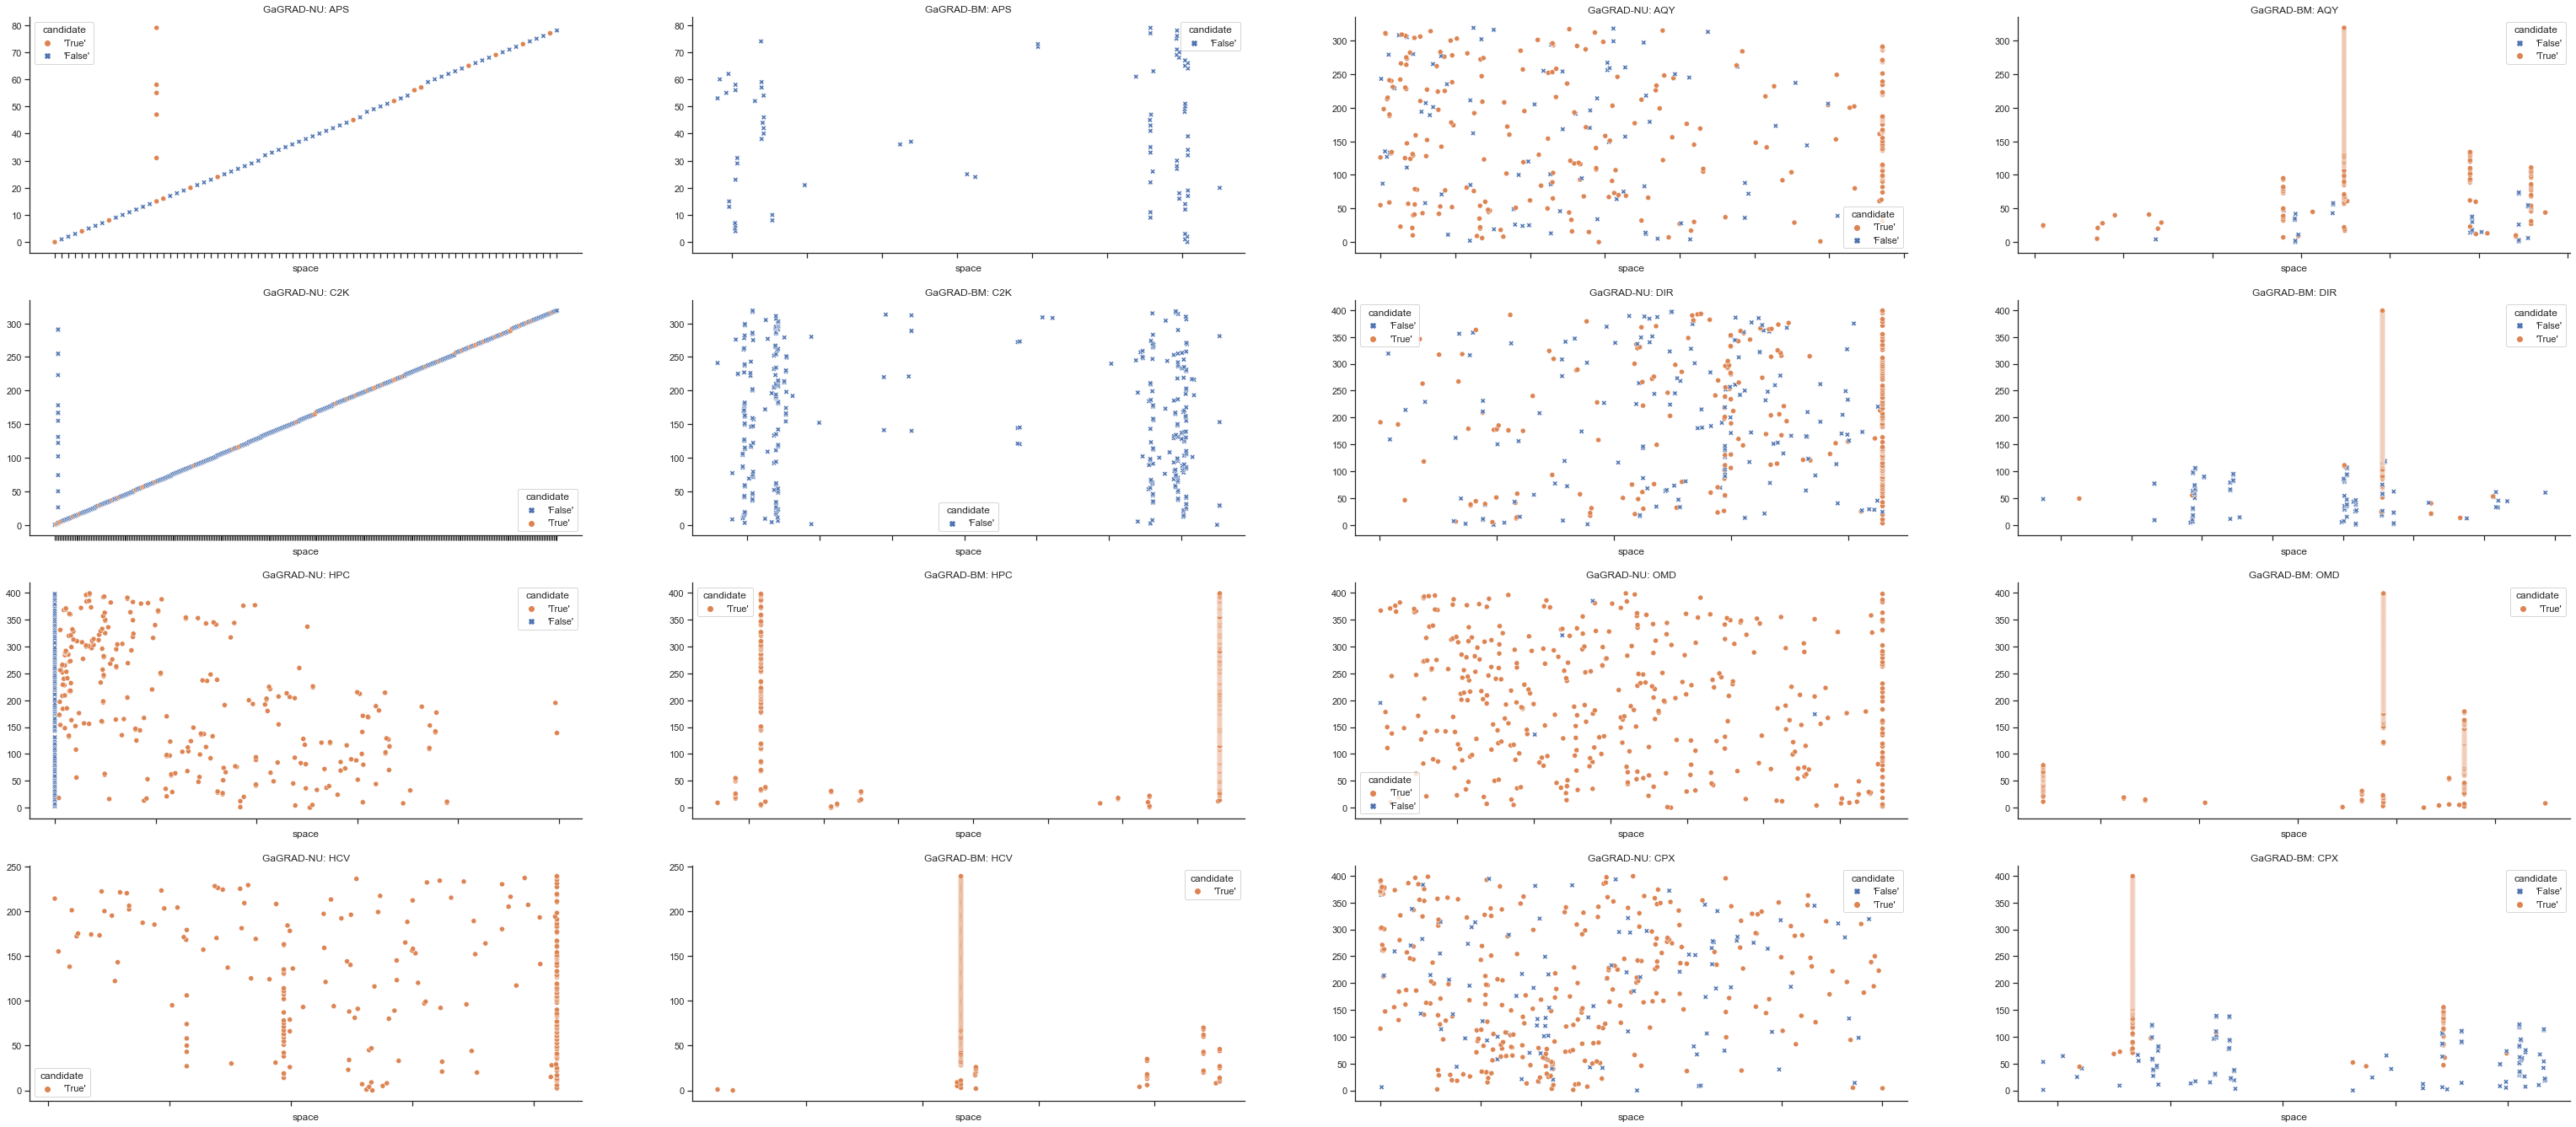

In [108]:
algorithms = ['GaGRAD-NU', 'GaGRAD-BM']#, 'PsoGRAD-NU', 'PsoGRAD-BM', 'PlsGRAD-NU', 'PlsGRAD-BM', 'PrsGRAD-NU', 'PrsGRAD-BM']
data_sets = ['APS', 'AQY', 'C2K', 'DIR', 'HPC', 'OMD', 'HCV', 'CPX']#, 'BCR']

def chunks(l, n):
    return [l[i:i+n] for i in range(0, len(l), n)]

fig = plt.figure(figsize=(54,36))
i = 1

for ds in data_sets:
    df1 = df_res.loc[df_res['Data-set'] == ds]
    
    for alg in algorithms:
        df2 = df1.loc[df1['Algorithm'] == alg]
        
        cand_str = df2['Candidates'].iloc[0].replace('[','').replace('],','\n').replace(']','').replace("' ","'").replace(" ","")
        cand_data = io.StringIO(cand_str)
        
        df_plot = pd.read_csv(cand_data, sep=",", names=['space', 'candidate'])
        y = np.arange(df_plot.shape[0])
        #print(df_plot)

        ax = plt.subplot(6, 4, i)
        ax.set_title(str(str(alg) + ': '+ str(ds)))
        markers = {"'False'": "X", "'True'": "o"}
        palette ={"'False'": "C0", "'True'": "C1"}
        sb = sns.scatterplot(data=df_plot, x="space", y=y, hue="candidate", style="candidate", markers=markers, palette=palette)
        sb.set(xticklabels=[])
        i += 1

        
#plt.savefig('scatter_ga.png')
# df_plot

#### 3.2.2 PsoGRAD Algorithm

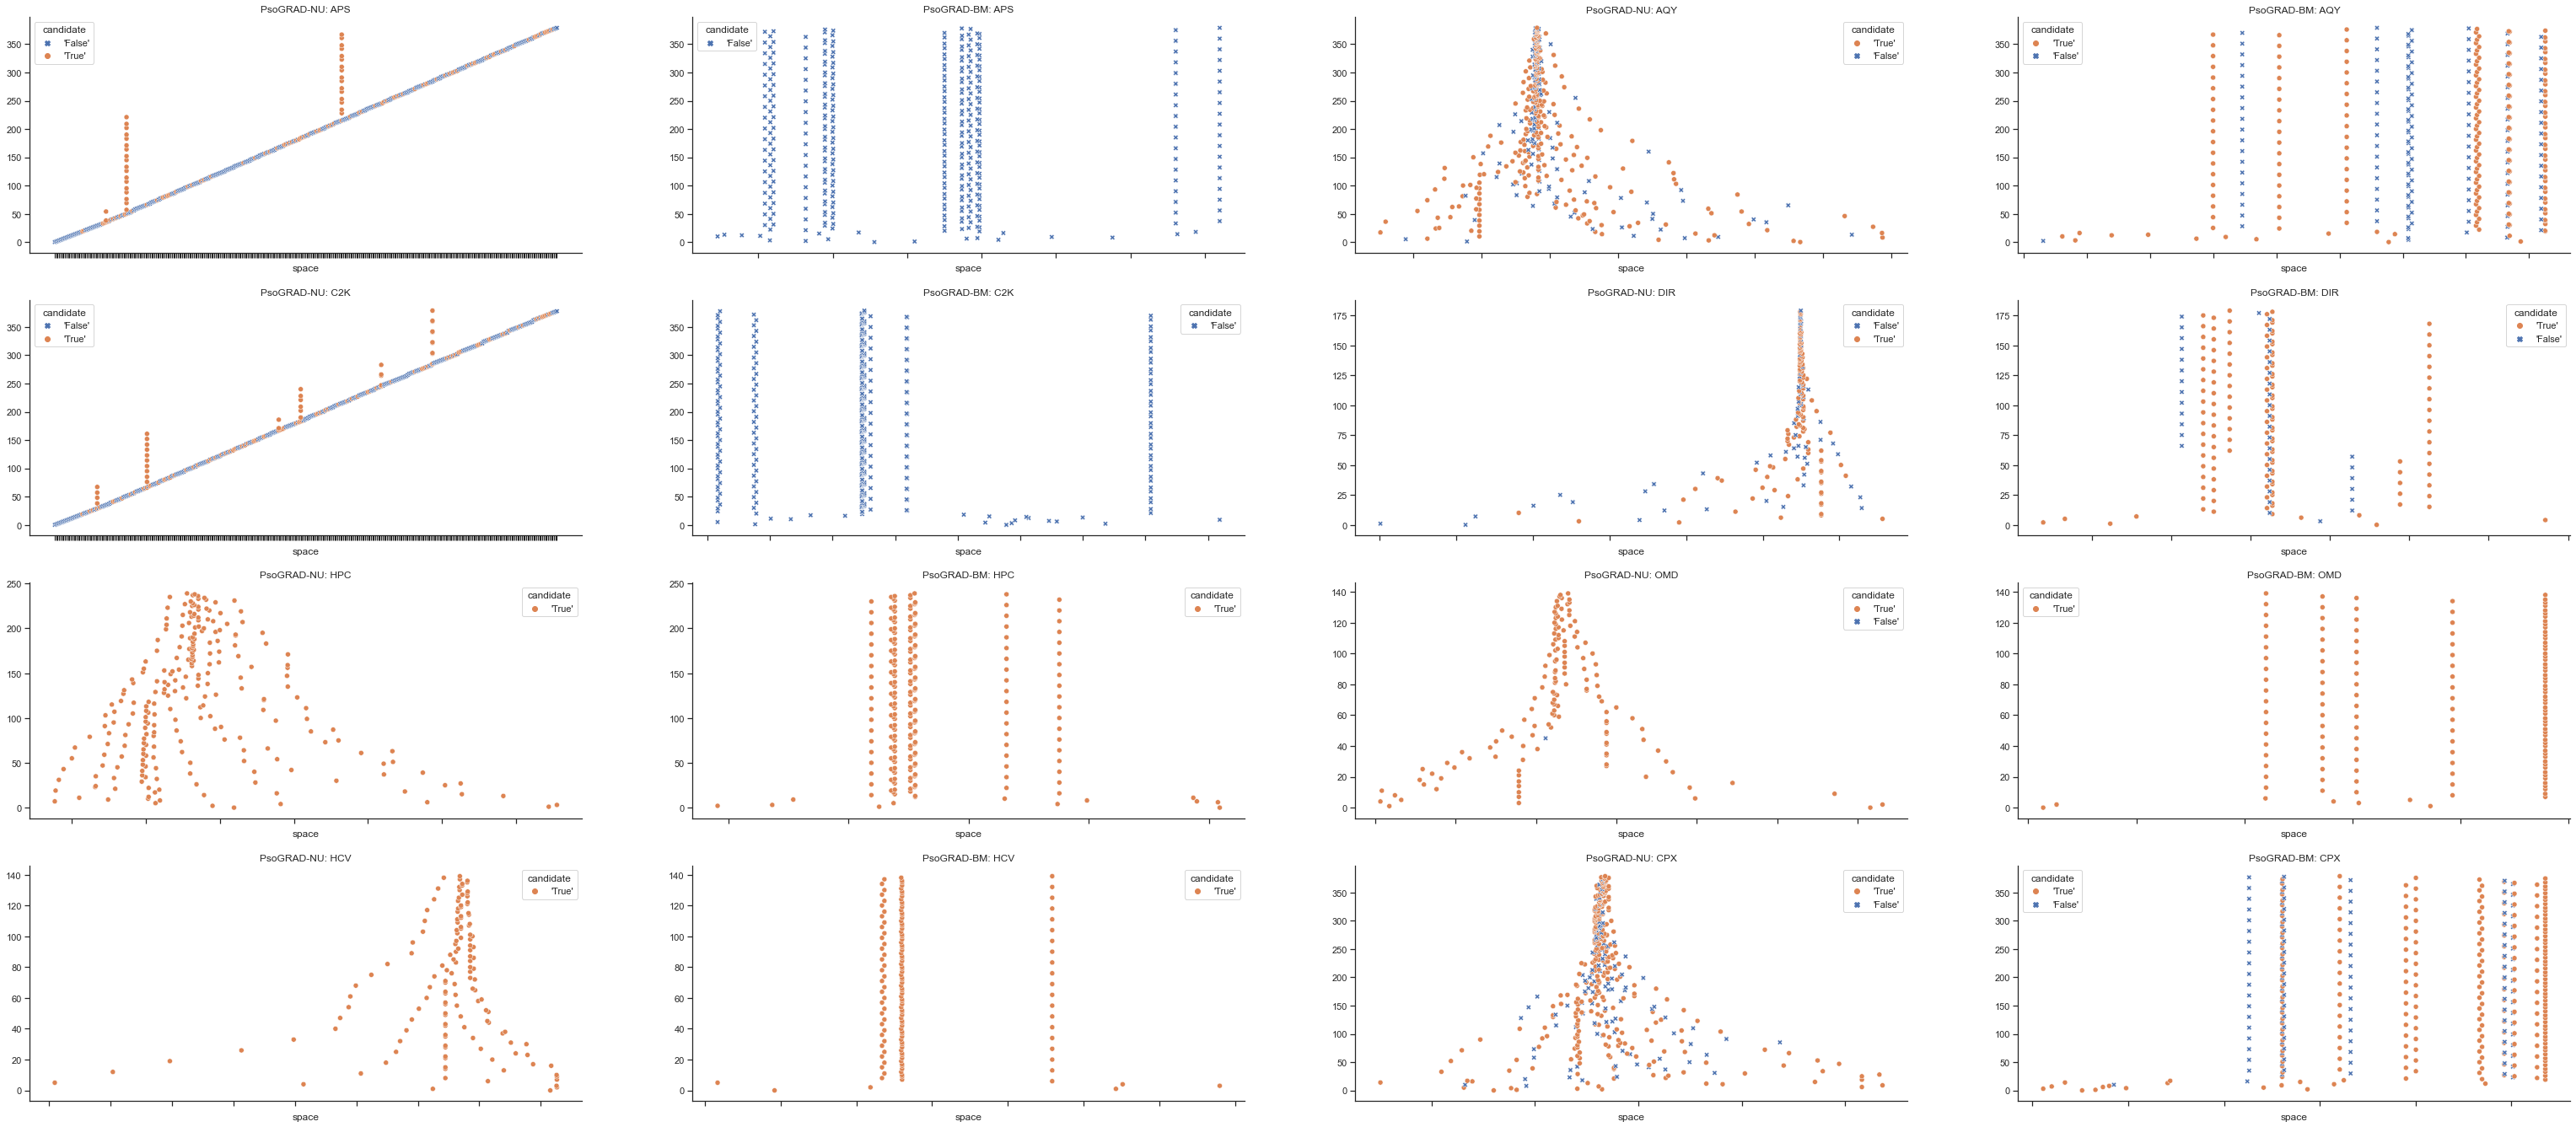

In [110]:
algorithms = ['PsoGRAD-NU', 'PsoGRAD-BM']
data_sets = ['APS', 'AQY', 'C2K', 'DIR', 'HPC', 'OMD', 'HCV', 'CPX']#, 'BCR']

def chunks(l, n):
    return [l[i:i+n] for i in range(0, len(l), n)]

fig = plt.figure(figsize=(54,36))
i = 1

for ds in data_sets:
    df1 = df_res.loc[df_res['Data-set'] == ds]
    
    for alg in algorithms:
        df2 = df1.loc[df1['Algorithm'] == alg]
        
        cand_str = df2['Candidates'].iloc[1].replace('[','').replace('],','\n').replace(']','').replace("' ","'").replace(" ","")
        cand_data = io.StringIO(cand_str)
        
        df_plot = pd.read_csv(cand_data, sep=",", names=['space', 'candidate'])
        y = np.arange(df_plot.shape[0])
        #print(df_plot)

        ax = plt.subplot(6, 4, i)
        ax.set_title(str(str(alg) + ': '+ str(ds)))
        markers = {"'False'": "X", "'True'": "o"}
        palette ={"'False'": "C0", "'True'": "C1"}
        sb = sns.scatterplot(data=df_plot, x="space", y=y, hue="candidate", style="candidate", markers=markers, palette=palette)
        sb.set(xticklabels=[])  
        i += 1

#plt.savefig('scatter_pso.png')
# df_plot

#### 3.2.3 PlsGRAD Algorithm

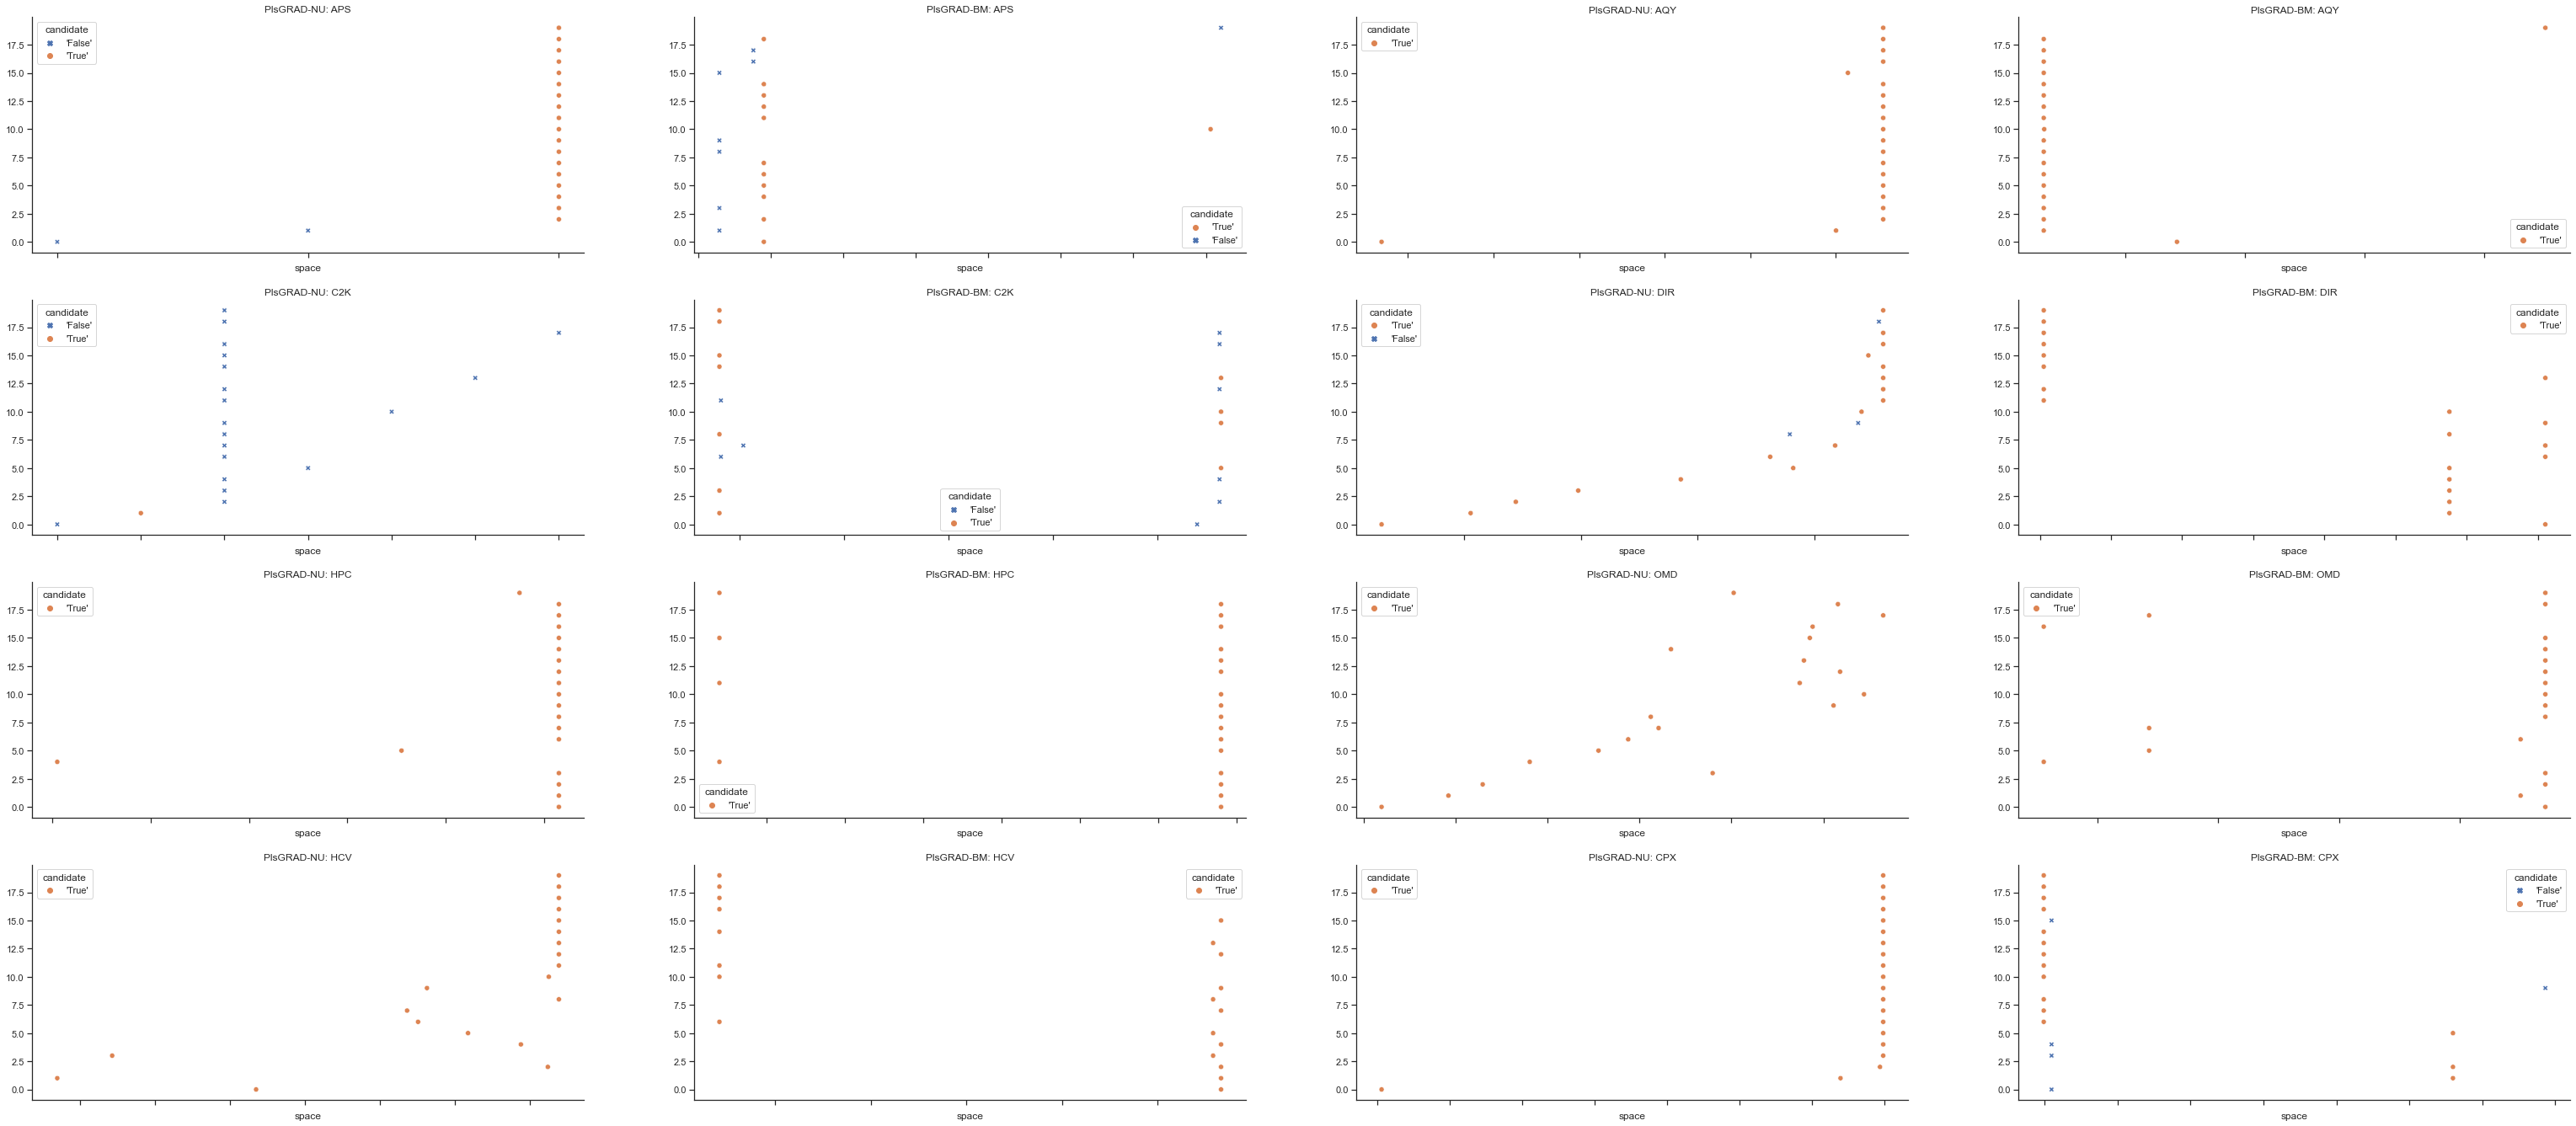

In [113]:
algorithms = [ 'PlsGRAD-NU', 'PlsGRAD-BM']
data_sets = ['APS', 'AQY', 'C2K', 'DIR', 'HPC', 'OMD', 'HCV', 'CPX']#, 'BCR']

def chunks(l, n):
    return [l[i:i+n] for i in range(0, len(l), n)]

fig = plt.figure(figsize=(54,36))
i = 1

for ds in data_sets:
    df1 = df_res.loc[df_res['Data-set'] == ds]
    
    for alg in algorithms:
        df2 = df1.loc[df1['Algorithm'] == alg]
        
        cand_str = df2['Candidates'].iloc[2].replace('[','').replace('],','\n').replace(']','').replace("' ","'").replace(" ","")
        cand_data = io.StringIO(cand_str)
        
        df_plot = pd.read_csv(cand_data, sep=",", names=['space', 'candidate'])
        y = np.arange(df_plot.shape[0])
        #print(df_plot)

        ax = plt.subplot(6, 4, i)
        ax.set_title(str(str(alg) + ': '+ str(ds)))
        markers = {"'False'": "X", "'True'": "o"}
        palette ={"'False'": "C0", "'True'": "C1"}
        sb = sns.scatterplot(data=df_plot, x="space", y=y, hue="candidate", style="candidate", markers=markers, palette=palette)
        sb.set(xticklabels=[])
        i += 1

        
#plt.savefig('scatter_pls.png')
# df_plot

#### 3.2.4 PrsGRAD Algorithm

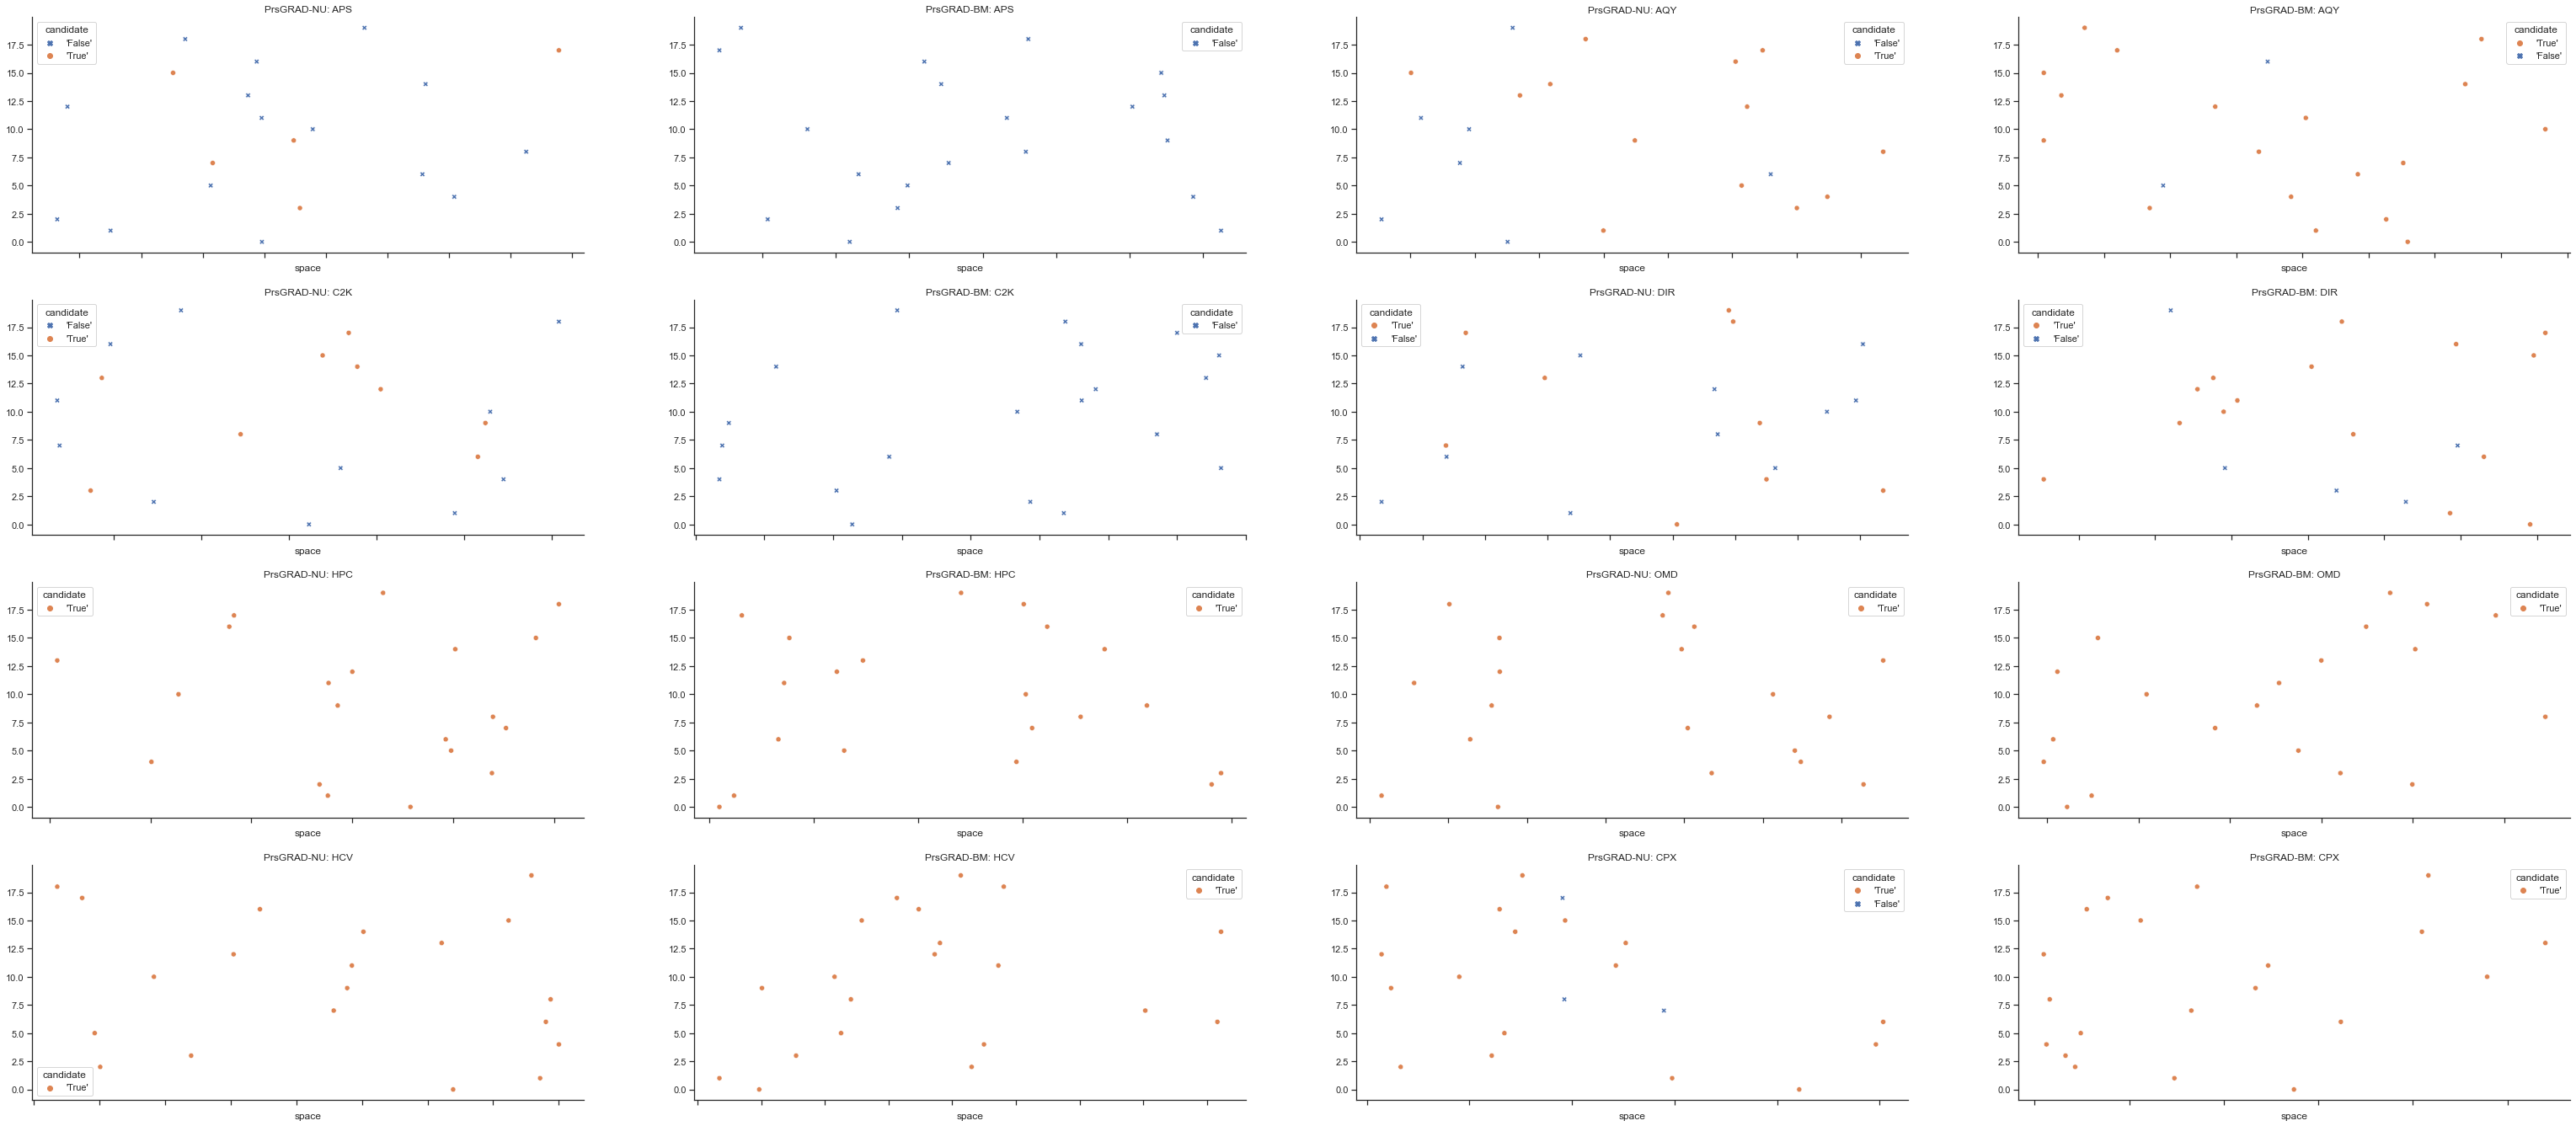

In [114]:
algorithms = ['PrsGRAD-NU', 'PrsGRAD-BM']
data_sets = ['APS', 'AQY', 'C2K', 'DIR', 'HPC', 'OMD', 'HCV', 'CPX']#, 'BCR']

def chunks(l, n):
    return [l[i:i+n] for i in range(0, len(l), n)]

fig = plt.figure(figsize=(54,36))
i = 1

for ds in data_sets:
    df1 = df_res.loc[df_res['Data-set'] == ds]
    
    for alg in algorithms:
        df2 = df1.loc[df1['Algorithm'] == alg]
        
        cand_str = df2['Candidates'].iloc[0].replace('[','').replace('],','\n').replace(']','').replace("' ","'").replace(" ","")
        cand_data = io.StringIO(cand_str)
        
        df_plot = pd.read_csv(cand_data, sep=",", names=['space', 'candidate'])
        y = np.arange(df_plot.shape[0])
        #print(df_plot)

        ax = plt.subplot(6, 4, i)
        ax.set_title(str(str(alg) + ': '+ str(ds)))
        markers = {"'False'": "X", "'True'": "o"}
        palette ={"'False'": "C0", "'True'": "C1"}
        sb = sns.scatterplot(data=df_plot, x="space", y=y, hue="candidate", style="candidate", markers=markers, palette=palette)
        sb.set(xticklabels=[])
        i += 1

#plt.savefig('scatter_prs.png')
# df_plot

## 4. Comparative analysis with existing GP algorithms
We compare the performance of our algorithms when applied on the numeric search space against other GP mining algorithms proposed by other researchers.

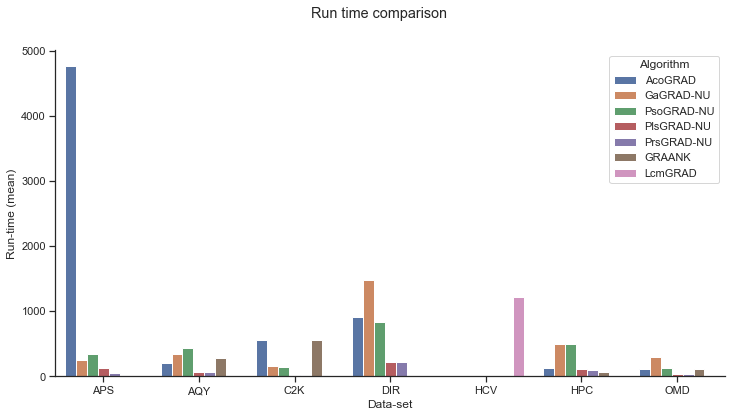

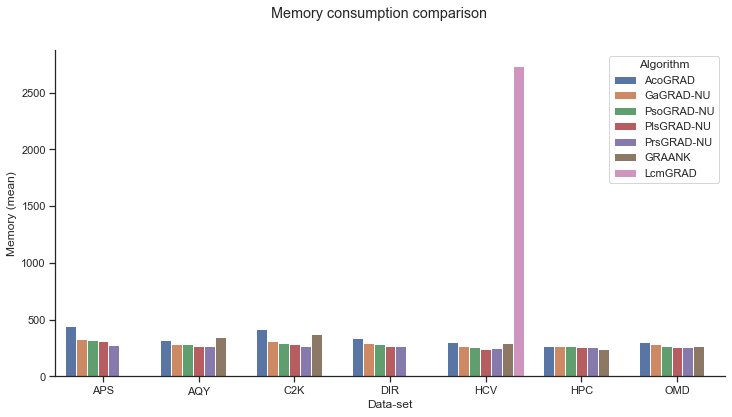

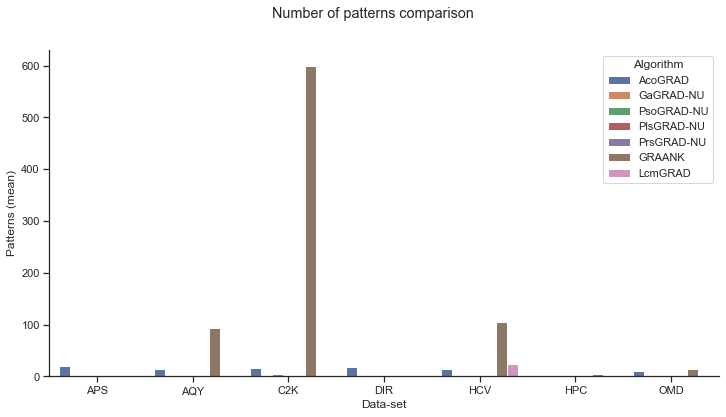

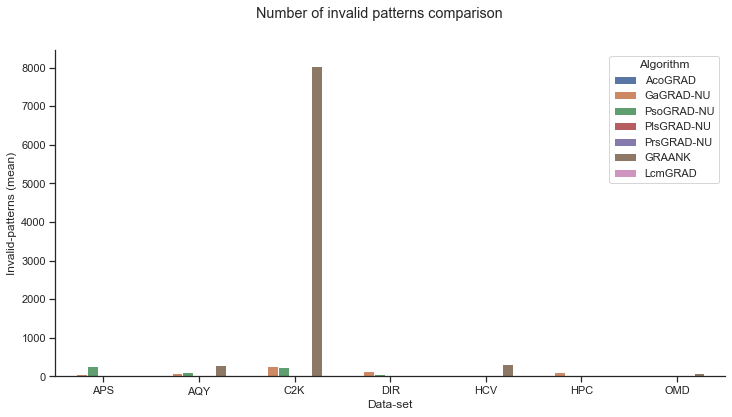

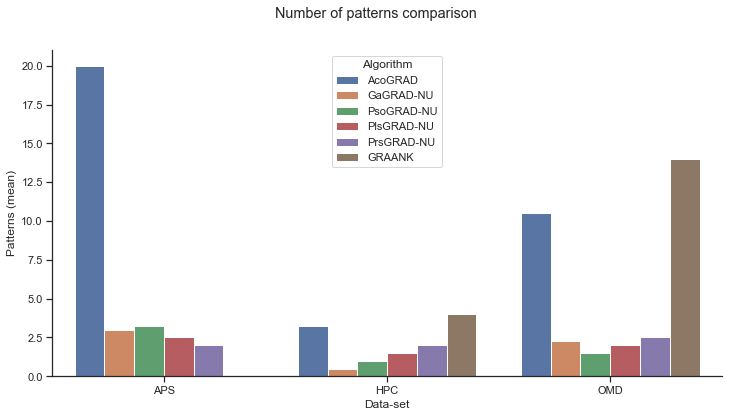

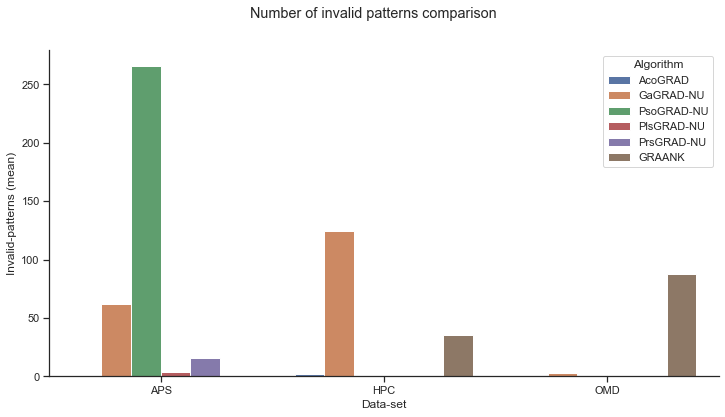

,Data-set,Algorithm,Run-time (mean),Run-time (std),Memory (mean),Memory (std),Patterns (mean),Patterns (std),Invalid-patterns (mean),Invalid-patterns (std)
0,APS,AcoGRAD,4771.5000,15.198684,444.00,0.000000,20.00,0.000000,0.00,0.000000
1,APS,GaGRAD-NU,243.1250,25.644671,330.25,0.500000,3.00,0.000000,61.75,2.217356
2,APS,PsoGRAD-NU,335.6500,9.952052,315.75,0.957427,3.25,1.500000,266.00,15.641824
3,APS,PlsGRAD-NU,133.8750,21.668160,315.00,1.414214,2.50,0.577350,3.50,3.000000
4,APS,PrsGRAD-NU,53.1725,2.594383,279.50,4.123106,2.00,1.154701,15.50,1.732051
70,HPC,GRAANK,72.1725,0.252636,240.75,0.500000,4.00,0.000000,35.00,0.000000
71,HPC,AcoGRAD,130.5000,4.934910,268.75,2.061553,3.25,0.500000,1.75,0.500000
72,HPC,GaGRAD-NU,495.5500,55.536444,270.00,2.943920,0.50,0.577350,124.00,7.745967
73,HPC,PsoGRAD-NU,489.7000,32.379108,265.25,2.217356,1.00,0.816497,0.00,0.000000
74,HPC,PlsGRAD-NU,114.7750,13.133259,254.00,1.154701,1.50,0.577350,0.00,0.000000


In [95]:
algorithms = ['GRAANK', 'AcoGRAD', 'LcmGRAD', 'GaGRAD-NU', 'PsoGRAD-NU', 'PlsGRAD-NU', 'PrsGRAD-NU']
data_sets = ['APS', 'AQY', 'C2K', 'DIR', 'HPC', 'OMD', 'HCV', 'CPX', 'BCR']

df_comp = df_data[['Data-set', 'Algorithm', 'Run-time (mean)', 'Run-time (std)', 'Memory (mean)', 'Memory (std)', 'Patterns (mean)', 'Patterns (std)', 'Invalid-patterns (mean)', 'Invalid-patterns (std)']]

df_comp = df_comp.drop(df_comp[df_comp['Algorithm'] == 'GaGRAD-BM'].index).drop(df_comp[df_comp['Algorithm'] == 'PsoGRAD-BM'].index).drop(df_comp[df_comp['Algorithm'] == 'PlsGRAD-BM'].index).drop(df_comp[df_comp['Algorithm'] == 'PrsGRAD-BM'].index)
df_comp = df_comp.drop(df_comp[df_comp['Data-set'] == 'CPX'].index).drop(df_comp[df_comp['Data-set'] == 'BCR'].index)


custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

fig = plt.figure(figsize=(12,6))
fig.suptitle('Run time comparison')
ax = sns.barplot(x="Data-set", y="Run-time (mean)", hue="Algorithm", data=df_comp, capsize=.05)
#plt.savefig('compare_run.png')


fig = plt.figure(figsize=(12,6))
fig.suptitle('Memory consumption comparison')
ax = sns.barplot(x="Data-set", y="Memory (mean)", hue="Algorithm", data=df_comp, capsize=.05)
#plt.savefig('compare_mem.png')



fig = plt.figure(figsize=(12,6))
fig.suptitle('Number of patterns comparison')
ax = sns.barplot(x="Data-set", y="Patterns (mean)", hue="Algorithm", data=df_comp, capsize=.05)
#plt.savefig('compare_pats1.png')


fig = plt.figure(figsize=(12,6))
fig.suptitle('Number of invalid patterns comparison')
ax = sns.barplot(x="Data-set", y="Invalid-patterns (mean)", hue="Algorithm", data=df_comp, capsize=.05)
#plt.savefig('compare_inv1.png')






# REPEATED

df_comp = df_comp.drop(df_comp[df_comp['Data-set'] == 'C2K'].index).drop(df_comp[df_comp['Data-set'] == 'DIR'].index).drop(df_comp[df_comp['Data-set'] == 'AQY'].index).drop(df_comp[df_comp['Data-set'] == 'HCV'].index)
fig = plt.figure(figsize=(12,6))
fig.suptitle('Number of patterns comparison')
ax = sns.barplot(x="Data-set", y="Patterns (mean)", hue="Algorithm", data=df_comp, capsize=.05)
#plt.savefig('compare_pats2.png')




fig = plt.figure(figsize=(12,6))
fig.suptitle('Number of invalid patterns comparison')
ax = sns.barplot(x="Data-set", y="Invalid-patterns (mean)", hue="Algorithm", data=df_comp, capsize=.05)
#plt.savefig('compare_inv2.png')



plt.show()
df_comp
